In [339]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, MinMaxScaler, StandardScaler, RobustScaler, Normalizer

In [340]:
df = pd.read_csv("/content/synthetic_coffee_health_10000.csv")
df

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,50,Female,Japan,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Moderate,Healthcare,0,1
9996,9997,18,Female,UK,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Mild,Service,0,0
9997,9998,26,Male,China,1.6,153.4,7.1,Good,25.1,66,Low,13.7,NaN,Student,1,1
9998,9999,40,Female,Finland,3.4,327.1,7.0,Good,19.3,80,Low,0.1,NaN,Student,0,0


In [341]:
df.shape

(10000, 16)

In [342]:
df.columns

Index(['ID', 'Age', 'Gender', 'Country', 'Coffee_Intake', 'Caffeine_mg',
       'Sleep_Hours', 'Sleep_Quality', 'BMI', 'Heart_Rate', 'Stress_Level',
       'Physical_Activity_Hours', 'Health_Issues', 'Occupation', 'Smoking',
       'Alcohol_Consumption'],
      dtype='object')

In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

In [344]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


In [345]:
df.duplicated().sum()

np.int64(0)

In [346]:
df.isnull().sum()

,0
ID,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0


In [347]:
df.drop(["Health_Issues", "ID", "Country"], axis=1, inplace=True)

In [348]:
df

,Age,Gender,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,Male,3.5,328.1,7.5,Good,24.9,78,Low,14.5,Other,0,0
1,33,Male,1.0,94.1,6.2,Good,20.0,67,Low,11.0,Service,0,0
2,42,Male,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Office,0,0
3,53,Male,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Other,0,0
4,32,Female,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Student,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,50,Female,2.1,199.8,6.0,Fair,30.5,50,Medium,10.1,Healthcare,0,1
9996,18,Female,3.4,319.2,5.8,Fair,19.1,71,Medium,11.6,Service,0,0
9997,26,Male,1.6,153.4,7.1,Good,25.1,66,Low,13.7,Student,1,1
9998,40,Female,3.4,327.1,7.0,Good,19.3,80,Low,0.1,Student,0,0


In [349]:
for col in df.columns:
  print(col, df[col].value_counts())
  print("----------------------------------------")

Age Age
18    935
34    354
32    352
37    346
35    338
38    325
31    310
30    310
40    308
36    308
39    304
29    294
33    294
27    291
28    285
43    276
41    276
42    274
25    256
24    229
26    225
44    223
23    221
45    213
46    208
47    194
22    194
49    173
21    171
48    166
20    154
50    137
51    133
19    133
52    114
54    103
53     96
55     84
56     58
57     57
59     52
58     41
60     37
61     25
62     23
63     18
64     14
65     14
66     13
70      8
67      8
68      8
72      7
80      2
71      2
73      2
69      2
77      1
75      1
Name: count, dtype: int64
----------------------------------------
Gender Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
----------------------------------------
Coffee_Intake Coffee_Intake
0.0    558
2.7    305
2.8    270
2.1    269
2.2    266
      ... 
7.8      2
7.7      2
7.1      1
8.2      1
7.2      1
Name: count, Length: 78, dtype: int64
----------------------

In [350]:
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,40,3.5,328.1,7.5,24.9,78,14.5,0,0
1,33,1.0,94.1,6.2,20.0,67,11.0,0,0
2,42,5.3,503.7,5.9,22.7,59,11.2,0,0
3,53,2.6,249.2,7.3,24.7,71,6.6,0,0
4,32,3.1,298.0,5.3,24.1,76,8.5,0,1
...,...,...,...,...,...,...,...,...,...
9995,50,2.1,199.8,6.0,30.5,50,10.1,0,1
9996,18,3.4,319.2,5.8,19.1,71,11.6,0,0
9997,26,1.6,153.4,7.1,25.1,66,13.7,1,1
9998,40,3.4,327.1,7.0,19.3,80,0.1,0,0


In [351]:
categorical_data = df.select_dtypes(include=['object']).columns
df[categorical_data]

,Gender,Sleep_Quality,Stress_Level,Occupation
0,Male,Good,Low,Other
1,Male,Good,Low,Service
2,Male,Fair,Medium,Office
3,Male,Good,Low,Other
4,Female,Fair,Medium,Student
...,...,...,...,...
9995,Female,Fair,Medium,Healthcare
9996,Female,Fair,Medium,Service
9997,Male,Good,Low,Student
9998,Female,Good,Low,Student


# **Numerical Features**

In [352]:
df[numeric_data]

,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,40,3.5,328.1,7.5,24.9,78,14.5,0,0
1,33,1.0,94.1,6.2,20.0,67,11.0,0,0
2,42,5.3,503.7,5.9,22.7,59,11.2,0,0
3,53,2.6,249.2,7.3,24.7,71,6.6,0,0
4,32,3.1,298.0,5.3,24.1,76,8.5,0,1
...,...,...,...,...,...,...,...,...,...
9995,50,2.1,199.8,6.0,30.5,50,10.1,0,1
9996,18,3.4,319.2,5.8,19.1,71,11.6,0,0
9997,26,1.6,153.4,7.1,25.1,66,13.7,1,1
9998,40,3.4,327.1,7.0,19.3,80,0.1,0,0


<Axes: >

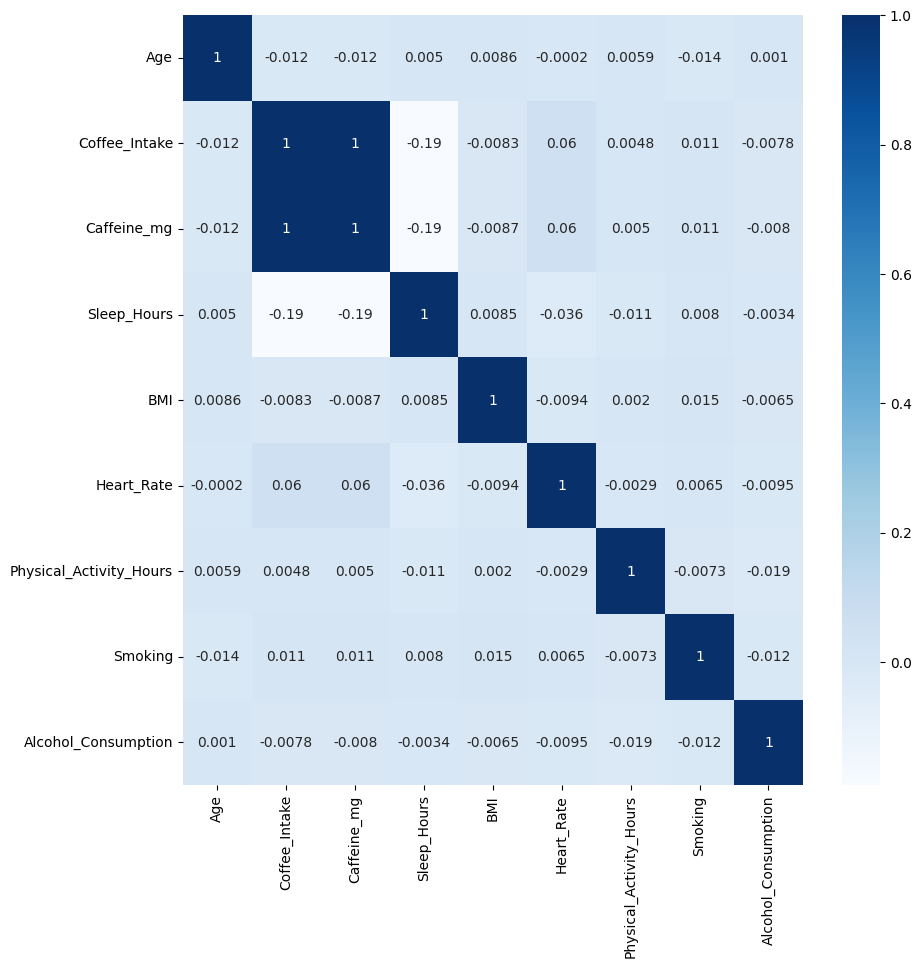

In [353]:
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_data].corr(), annot=True, cmap='Blues')

In [354]:
df.drop(["Coffee_Intake"], axis=1, inplace=True)
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,Age,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
0,40,328.1,7.5,24.9,78,14.5,0,0
1,33,94.1,6.2,20.0,67,11.0,0,0
2,42,503.7,5.9,22.7,59,11.2,0,0
3,53,249.2,7.3,24.7,71,6.6,0,0
4,32,298.0,5.3,24.1,76,8.5,0,1
...,...,...,...,...,...,...,...,...
9995,50,199.8,6.0,30.5,50,10.1,0,1
9996,18,319.2,5.8,19.1,71,11.6,0,0
9997,26,153.4,7.1,25.1,66,13.7,1,1
9998,40,327.1,7.0,19.3,80,0.1,0,0


Text(0.5, 0.98, 'Numerical Features')

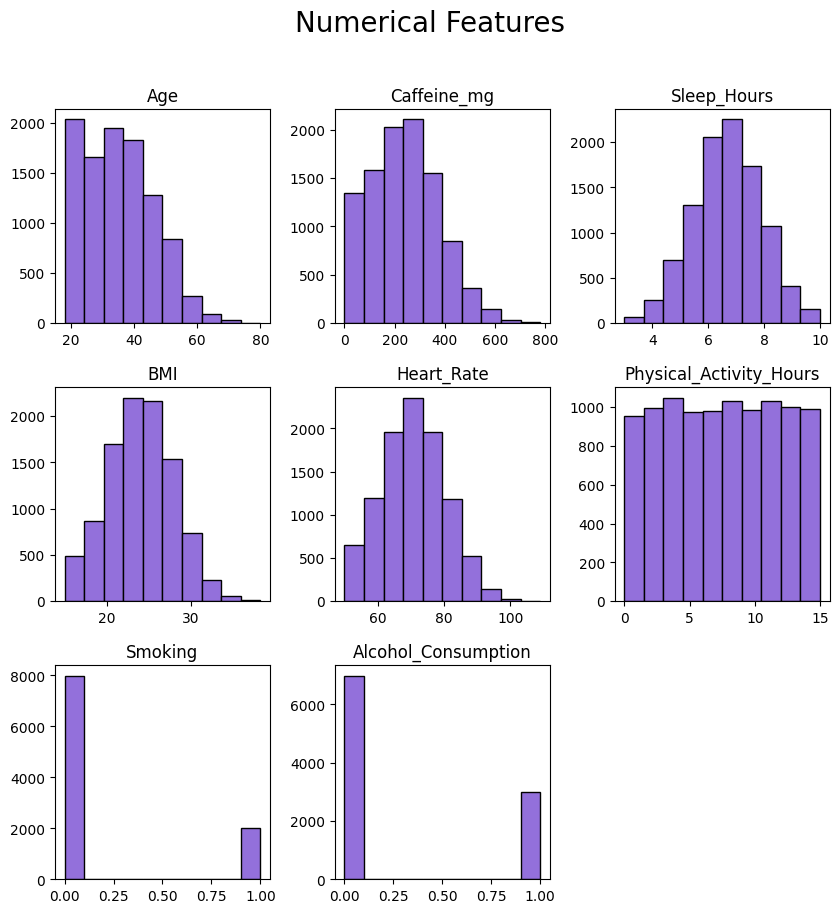

In [355]:
df[numeric_data].hist(figsize=(10,10), color='mediumpurple', edgecolor='black', grid=False)
plt.suptitle('Numerical Features', fontsize=20)

In [356]:
df.drop(["Smoking", "Alcohol_Consumption"], axis=1, inplace=True)
numeric_data = df.select_dtypes(include=['number']).columns
df[numeric_data]

,Age,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours
0,40,328.1,7.5,24.9,78,14.5
1,33,94.1,6.2,20.0,67,11.0
2,42,503.7,5.9,22.7,59,11.2
3,53,249.2,7.3,24.7,71,6.6
4,32,298.0,5.3,24.1,76,8.5
...,...,...,...,...,...,...
9995,50,199.8,6.0,30.5,50,10.1
9996,18,319.2,5.8,19.1,71,11.6
9997,26,153.4,7.1,25.1,66,13.7
9998,40,327.1,7.0,19.3,80,0.1


In [357]:
df['Age'] = np.log1p(df['Age'])

(array([1222.,  815., 1057., 1266., 1965., 1661., 1224.,  605.,  162.,
          23.]),
 array([2.94443898, 3.08944   , 3.23444101, 3.37944203, 3.52444305,
        3.66944407, 3.81444508, 3.9594461 , 4.10444712, 4.24944814,
        4.39444915]),
 <BarContainer object of 10 artists>)

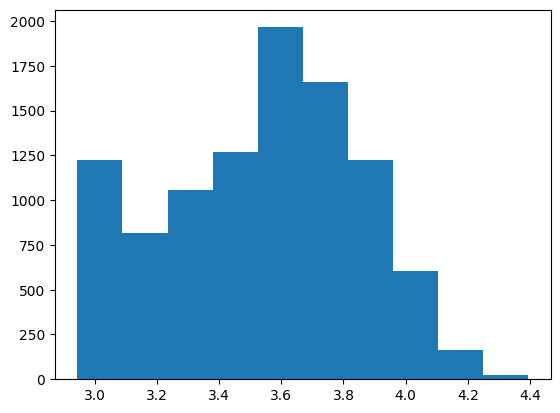

In [358]:
plt.hist(df['Age'], bins=10)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9f2187a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9f3f7f20>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e9f236cc0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9f3f54c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9f3f64e0>],
 'means': []}

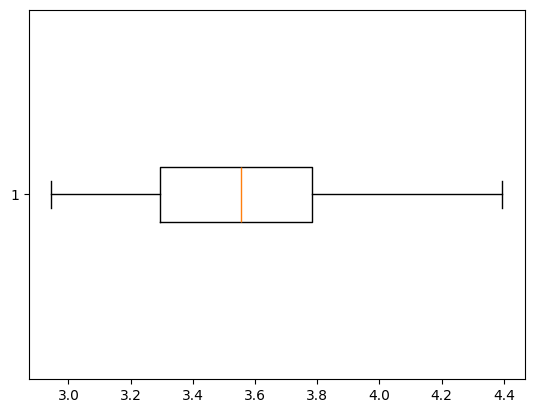

In [359]:
plt.boxplot(df['Age'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9f395f70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9f3965d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e9f396060>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9f4efd70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9f50a360>],
 'means': []}

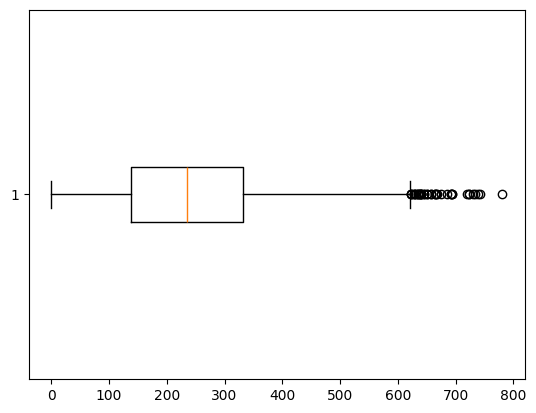

In [360]:
plt.boxplot(df['Caffeine_mg'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9f41ce90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9f41c380>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e9f41dca0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9f41e3c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9f41f3b0>],
 'means': []}

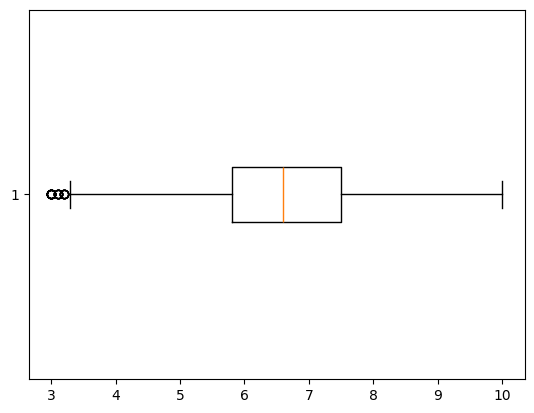

In [361]:
plt.boxplot(df['Sleep_Hours'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9fd84f80>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9fd85820>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e9fd84200>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9fd85a60>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9fd861b0>],
 'means': []}

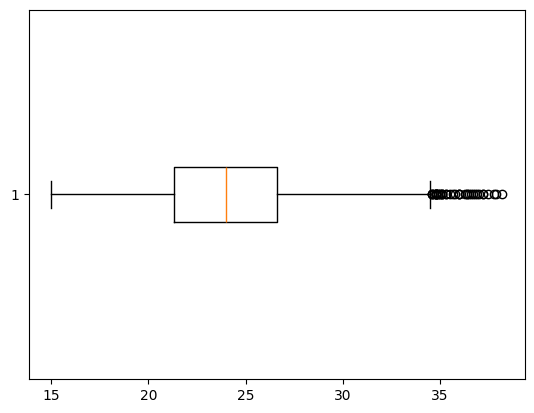

In [362]:
plt.boxplot(df['BMI'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9fd2c110>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9fd2fdd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2e9fdd5580>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2e9fd2fa10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2e9fd2f7d0>],
 'means': []}

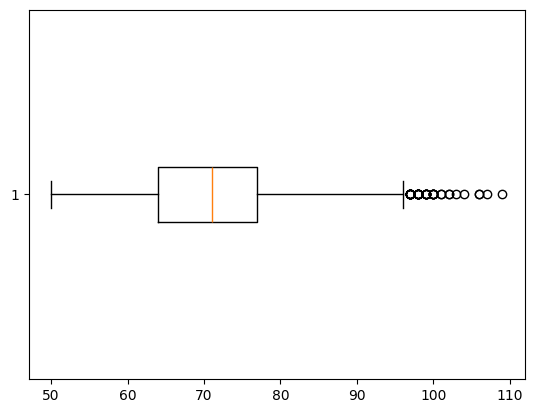

In [363]:
plt.boxplot(df['Heart_Rate'], vert = False)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f2e9fe38a70>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2e9fe3b530>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f2ea0197e60>],
 'medians': [<matplotlib.lines.Line2D at 0x7f2ea271e990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f2ea00d5310>],
 'means': []}

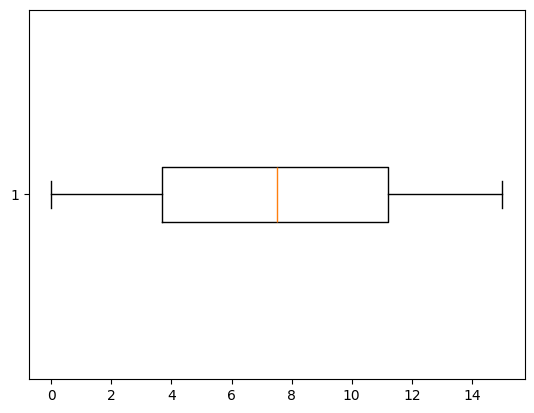

In [364]:
plt.boxplot(df['Physical_Activity_Hours'], vert = False)

# **Categorical Data**

In [365]:
df[categorical_data]

,Gender,Sleep_Quality,Stress_Level,Occupation
0,Male,Good,Low,Other
1,Male,Good,Low,Service
2,Male,Fair,Medium,Office
3,Male,Good,Low,Other
4,Female,Fair,Medium,Student
...,...,...,...,...
9995,Female,Fair,Medium,Healthcare
9996,Female,Fair,Medium,Service
9997,Male,Good,Low,Student
9998,Female,Good,Low,Student


In [366]:
for col in categorical_data:
  print(f'Unique values in {col} = {df[col].unique()}')
  print("---------------------------------------------------------------------------------------------------------------\n")

Unique values in Gender = ['Male' 'Female' 'Other']
---------------------------------------------------------------------------------------------------------------

Unique values in Sleep_Quality = ['Good' 'Fair' 'Excellent' 'Poor']
---------------------------------------------------------------------------------------------------------------

Unique values in Stress_Level = ['Low' 'Medium' 'High']
---------------------------------------------------------------------------------------------------------------

Unique values in Occupation = ['Other' 'Service' 'Office' 'Student' 'Healthcare']
---------------------------------------------------------------------------------------------------------------



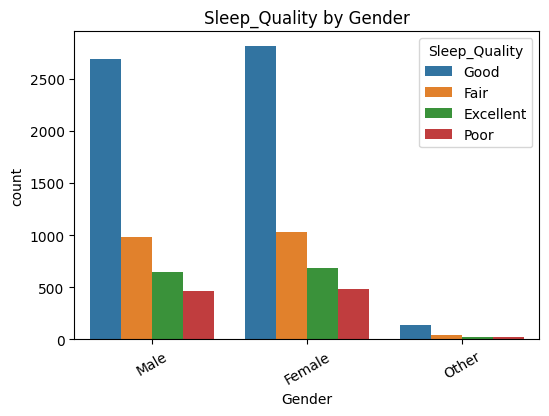

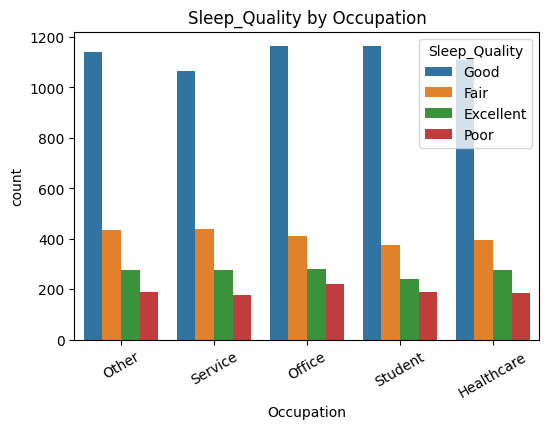

In [367]:
categorical_cols = ['Gender', 'Occupation']

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Sleep_Quality')
    plt.title(f'Sleep_Quality by {col}')
    plt.xticks(rotation=30)
    plt.show()

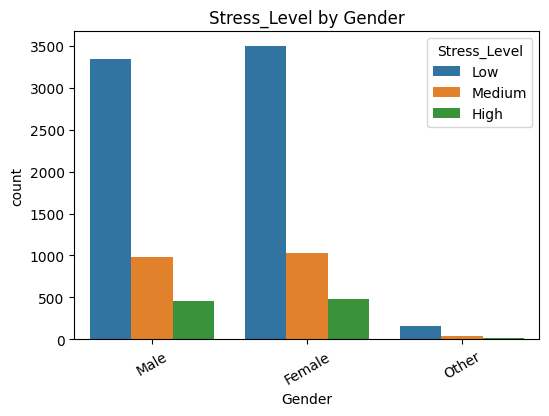

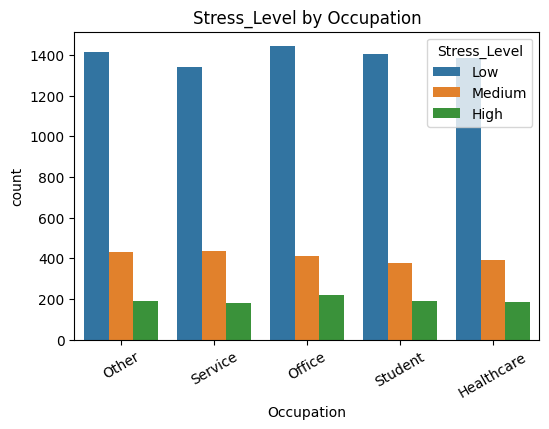

In [368]:

for col in categorical_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Stress_Level')
    plt.title(f'Stress_Level by {col}')
    plt.xticks(rotation=30)
    plt.show()

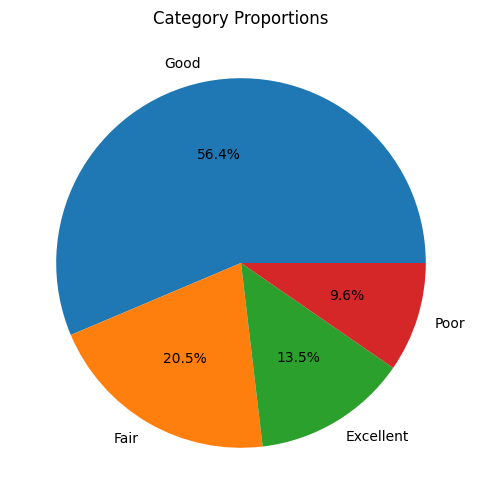

In [369]:
df["Sleep_Quality"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

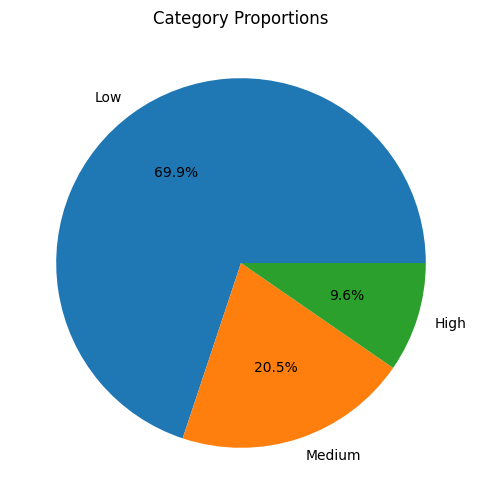

In [370]:
df["Stress_Level"].value_counts().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Category Proportions")
plt.ylabel("")
plt.show()

# **Train & Test Split Sleep_Quality**

In [371]:
from sklearn.model_selection import train_test_split

In [372]:
# X = features, y = target
X1 = df.drop('Sleep_Quality', axis=1)
y1 = df['Sleep_Quality']

X2 = df.drop('Stress_Level', axis=1)
y2 = df['Stress_Level']

In [373]:
# Split into 80% train and 20% test
X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42, stratify=y1
)

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42, stratify=y2
)

In [374]:
print("Train shape 1:", X1_train.shape, y1_train.shape)
print("Test shape 1:", X1_test.shape, y1_test.shape)

print("Train shape 2:", X2_train.shape, y2_train.shape)
print("Test shape 2:", X2_test.shape, y2_test.shape)

Train shape 1: (8000, 9) (8000,)
Test shape 1: (2000, 9) (2000,)
Train shape 2: (8000, 9) (8000,)
Test shape 2: (2000, 9) (2000,)


In [375]:
df

,Age,Gender,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation
0,3.713572,Male,328.1,7.5,Good,24.9,78,Low,14.5,Other
1,3.526361,Male,94.1,6.2,Good,20.0,67,Low,11.0,Service
2,3.761200,Male,503.7,5.9,Fair,22.7,59,Medium,11.2,Office
3,3.988984,Male,249.2,7.3,Good,24.7,71,Low,6.6,Other
4,3.496508,Female,298.0,5.3,Fair,24.1,76,Medium,8.5,Student
...,...,...,...,...,...,...,...,...,...,...
9995,3.931826,Female,199.8,6.0,Fair,30.5,50,Medium,10.1,Healthcare
9996,2.944439,Female,319.2,5.8,Fair,19.1,71,Medium,11.6,Service
9997,3.295837,Male,153.4,7.1,Good,25.1,66,Low,13.7,Student
9998,3.713572,Female,327.1,7.0,Good,19.3,80,Low,0.1,Student


# **Encode & Scaling The Data**

In [376]:
# ================================
# Encoding لـ X1 (Sleep_Quality target)
# ================================
for col in X1_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X1_train[col] = le.fit_transform(X1_train[col])
    X1_test[col] = le.transform(X1_test[col])

# ================================
# Encoding لـ X2 (Stress_Level target)
# ================================
for col in X2_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X2_train[col] = le.fit_transform(X2_train[col])
    X2_test[col] = le.transform(X2_test[col])

In [377]:
X1_train

,Age,Gender,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation
7834,3.637586,1,102.3,6.9,27.3,84,1,11.9,4
3563,3.912023,1,231.4,5.9,27.3,85,2,2.2,4
1496,4.094345,0,122.7,4.8,20.4,69,0,10.4,2
4939,2.944439,1,236.8,6.4,21.7,59,1,11.2,4
5309,3.178054,1,210.1,6.8,22.3,64,1,12.1,3
...,...,...,...,...,...,...,...,...,...
3725,3.737670,1,85.4,7.2,25.8,82,1,1.0,0
941,3.828641,1,249.5,4.8,21.9,80,0,7.4,1
5674,2.995732,0,620.6,8.1,29.1,70,1,12.7,4
6884,3.637586,0,444.8,6.5,22.0,85,1,2.8,1


In [378]:
scaler1 = RobustScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)

scaler2 = RobustScaler()
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

# **DecisionTreeClassifier Model**

In [379]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Sleep Quality model
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X1_train, y1_train)

y1_pred = dt1.predict(X1_test)
print("Sleep Quality Decision Tree Accuracy:", accuracy_score(y1_test, y1_pred))
print("Sleep Quality Report:\n", classification_report(y1_test, y1_pred))

# Stress Level model
dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X2_train, y2_train)

y2_pred = dt2.predict(X2_test)
print("Stress Level Decision Tree Accuracy:", accuracy_score(y2_test, y2_pred))
print("Stress Level Report:\n", classification_report(y2_test, y2_pred))


Sleep Quality Decision Tree Accuracy: 0.989
Sleep Quality Report:
               precision    recall  f1-score   support

   Excellent       0.95      0.97      0.96       270
        Fair       1.00      1.00      1.00       410
        Good       0.99      0.99      0.99      1128
        Poor       1.00      1.00      1.00       192

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000

Stress Level Decision Tree Accuracy: 1.0
Stress Level Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       192
         Low       1.00      1.00      1.00      1398
      Medium       1.00      1.00      1.00       410

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [380]:
import joblib

In [386]:
joblib.dump(dt2, r"dt2.pkl")

['dt2.pkl']